# Data Exploration

### Import Packages
Import the necessary packages that will be used in the exploration.

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Data Loader
load the data file into the notebook using pandas.

In [32]:
# siemens_amberg_labeled
File_NAME = "/siemens_amberg_labeled.csv"
SIEMENS_DATA_PATH= "./data/siemens_amberg_labeled"

# sehoaoi_labeled
# File_NAME = "/sehoaoi_labeled.csv"
SEHOAOI_DATA_PATH= "./data/sehoaoi_labeled"

IMAGE_PATH = "/exactInspImage/"

In [33]:
df = pd.read_csv(SIEMENS_DATA_PATH+File_NAME)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InspID              5199 non-null   object 
 1   jobCenterX          5199 non-null   float64
 2   jobCenterY          5199 non-null   float64
 3   sizeX               5199 non-null   float64
 4   sizeY               5199 non-null   float64
 5   typ                 5199 non-null   object 
 6   redUsed             5199 non-null   int64  
 7   blueUsed            5199 non-null   int64  
 8   rvl                 5199 non-null   int64  
 9   bvl                 5199 non-null   int64  
 10  rvh                 5199 non-null   int64  
 11  bvh                 5199 non-null   int64  
 12  rpl                 5199 non-null   float64
 13  bpl                 5199 non-null   float64
 14  rph                 5199 non-null   int64  
 15  bph                 5199 non-null   int64  
 16  ergRed

In [34]:
data_to_keep = ["imageIndex", "typ", "errText", "errorClassCombined", "errorClassText", "is_good" ]
df = df[data_to_keep]

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   imageIndex          5199 non-null   int64 
 1   typ                 5199 non-null   object
 2   errText             5199 non-null   object
 3   errorClassCombined  5199 non-null   object
 4   errorClassText      5199 non-null   object
 5   is_good             5199 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 243.8+ KB


,imageIndex,typ,errText,errorClassCombined,errorClassText,is_good
0,0,RECT,Lotperle,THT Loetst.Form mangelhaft,THT Loetst.Form mangelhaft,0
1,1,RECT,Lotperle,good,AOI Gut Pruefung,1
2,2,RECT,Lotperle,good,AOI Gut Pruefung,1
3,3,RECT,Lotperle,good,AOI Gut Pruefung,1
4,4,RECT,Lotperle,good,AOI Gut Pruefung,1


## Clean All 'AOI Gut Pruefung' Data 

In [35]:
# Check if 'errorClassText' column exists first to avoid errors
if 'errorClassText' in df:
    # Remove rows with "AOI Gut Pruefung" in the "errorClassText" column
    df = df[df['errorClassText'] != 'AOI Gut Pruefung']

df.head()

,imageIndex,typ,errText,errorClassCombined,errorClassText,is_good
0,0,RECT,Lotperle,THT Loetst.Form mangelhaft,THT Loetst.Form mangelhaft,0
6,6,RECT,Lotperle,THT Loetst.Form mangelhaft,THT Loetst.Form mangelhaft,0
7,7,RECT,Lotperle,THT Loetbruecke,THT Loetbruecke,0
8,8,RECT,Lotperle,THT Loetbruecke,THT Loetbruecke,0
9,9,RECT,Lotperle,THT Loetbruecke,THT Loetbruecke,0


# Create new column from the errorClassText

In [36]:
# Create a new boolean column 'is_PseudoFehler' where the value is 1 if 'errorClassText' is "PseudoFehler", otherwise 0
df['is_PseudoFehler'] = df['errorClassText'].apply(lambda x: 1 if x == "PseudoFehler" else 0)

df.head()

PseudoFehler_counts = df['is_PseudoFehler'].value_counts()
PseudoFehler_counts


is_PseudoFehler
0    935
1    905
Name: count, dtype: int64

### Display Function

In [37]:
def display_image(file_name, title):
    try:
        img = Image.open(file_name)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
    except Exception as e:
        print(f"An error occurred while opening {file_name}: {e}")

## Type of data 
### typ

In [22]:
# Unique Value of the typ
unique_values = df['typ'].unique()
print(df['typ'].value_counts())

typ
ELLIPSE    26499
RECT        2968
Name: count, dtype: int64


./data/siemens_amberg_labeled/exactInspImage/0


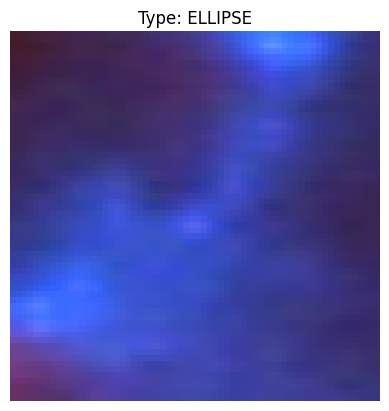

./data/siemens_amberg_labeled/exactInspImage/3


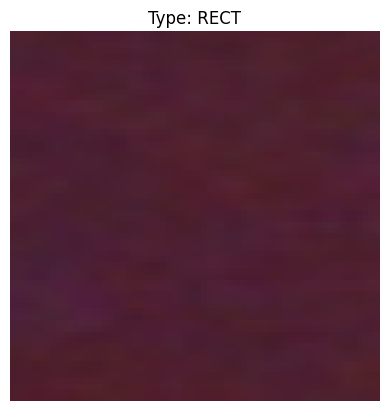

In [23]:
unique_types = df['typ'].unique()
for typ in unique_types:
    # Find the first image index for the current type
    image_file = df[df['typ'] == typ]['imageIndex'].iloc[0]
    print(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file))
    display_image(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file)+".png", f"Type: {typ}")

## Type of error Text
### errText

In [24]:
# Unique Value of the errText
unique_values = df['errText'].unique()
print(df['errText'].value_counts())

errText
Pin                     11865
Meniskus                 7409
Lötung                   5419
Klemmträger verlötet     1939
solderbridge             1316
Lotperle                 1311
Brücke                    130
no solder                  74
Perle                       3
Loperle                     1
Name: count, dtype: int64


| German                   | English                    | Number |
|--------------------------|----------------------------|--------|
| Pin                      | Pin                        | 1621   |
| Meniskus                 | Meniscus                   | 1411   |
| Lötung                   | Soldering                  | 1110   |
| Lotperle                 | Solder bead                | 524    |
| Klemmträger verlötet     | Clamp carrier soldered     | 444    |
| no solder                | no solder                  | 89     |


./data/siemens_amberg_labeled/exactInspImage/0


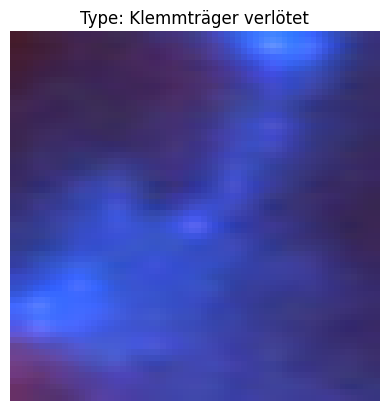

./data/siemens_amberg_labeled/exactInspImage/1


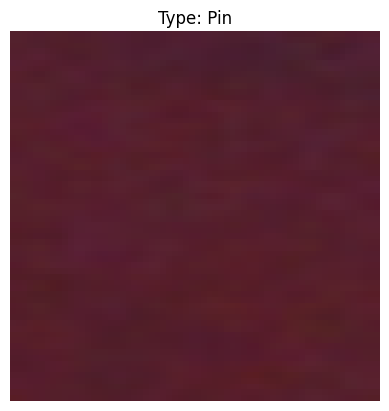

./data/siemens_amberg_labeled/exactInspImage/3


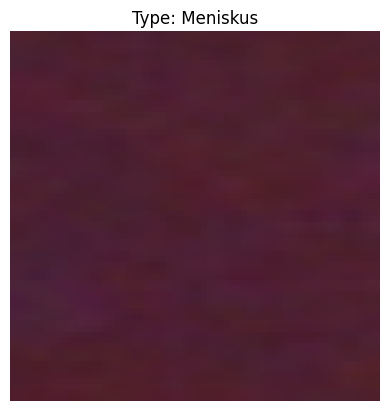

./data/siemens_amberg_labeled/exactInspImage/16


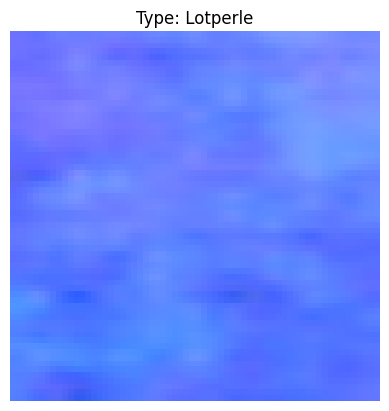

./data/siemens_amberg_labeled/exactInspImage/27


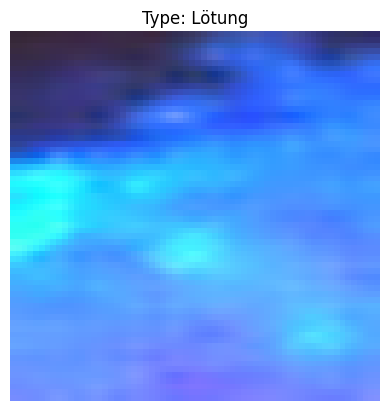

./data/siemens_amberg_labeled/exactInspImage/825


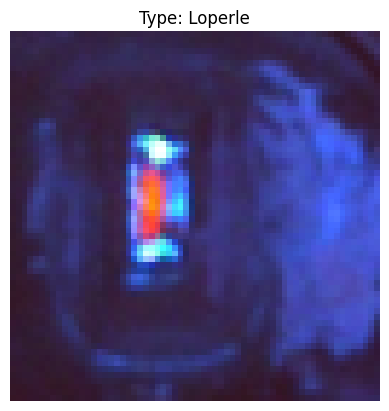

./data/siemens_amberg_labeled/exactInspImage/1590


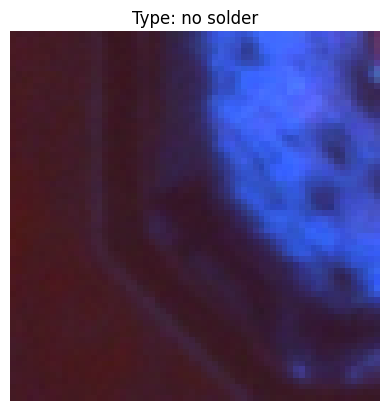

./data/siemens_amberg_labeled/exactInspImage/1597


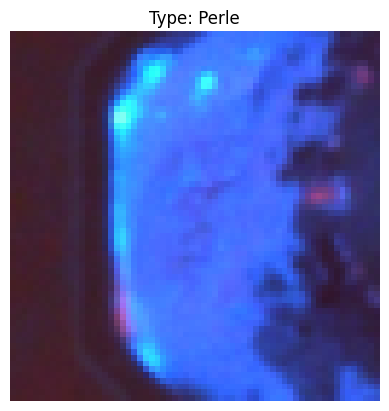

./data/siemens_amberg_labeled/exactInspImage/3160


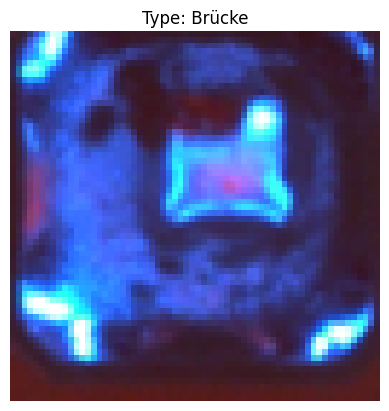

./data/siemens_amberg_labeled/exactInspImage/4729


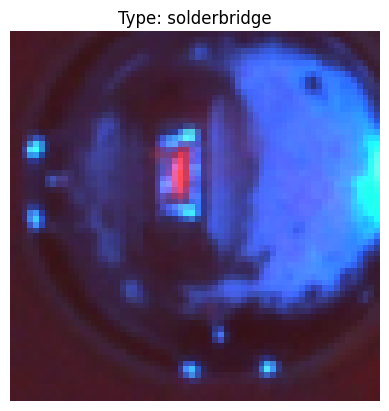

In [25]:
unique_types = df['errText'].unique()
for errText in unique_types:
    # Find the first image index for the current type
    image_file = df[df['errText'] == errText]['imageIndex'].iloc[0]
    print(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file))
    display_image(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file)+".png", f"Type: {errText}")

## Type of error Class
### errorClassCombined

In [26]:
# Unique Value of the errorClassCombined
unique_values = df['errorClassCombined'].unique()
print(df['errorClassCombined'].value_counts())

errorClassCombined
good                              14557
THT Loetstelle offen               4944
THT Bauteil fehlt                  4424
THT Bauteil liegt nicht auf        3134
THT Loetbruecke                     874
THT Lotkugeln                       719
THT Loetdurchstieg mangelhaft       399
THT Loetst.Form mangelhaft          236
THT Bauteil versetzt                106
Pseudofehler                         38
THT Bauteil mechan beschaedigt       30
THT Bauteil Montage falsch            2
THT Bauteil falsch                    2
THT Bauteil verpolt                   1
Pin fehlt                             1
Name: count, dtype: int64


| German                          | English                      | Number |
|---------------------------------|------------------------------|--------|
| good                            | good                         | 4264   |
| THT Bauteil fehlt               | THT component missing        | 281    |
| THT Bauteil liegt nicht auf     | THT component is not at      | 247    |
| THT Loetstelle offen            | THT soldering point open     | 211    |
| THT Loetbruecke                 | THT Loetbruecke              | 189    |
| THT Loetst.Form mangelhaft      | THT soldering form defective | 6      |
| THT Bauteil versetzt            | THT component offset         | 1      |


./data/siemens_amberg_labeled/exactInspImage/0


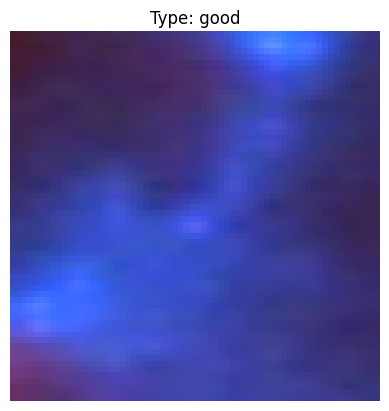

./data/siemens_amberg_labeled/exactInspImage/27


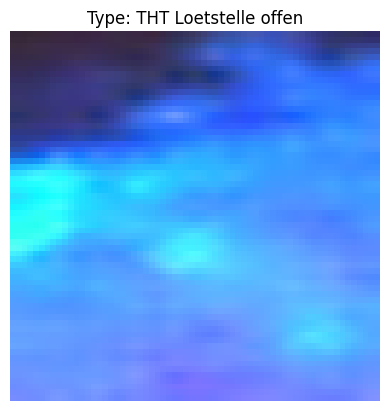

./data/siemens_amberg_labeled/exactInspImage/350


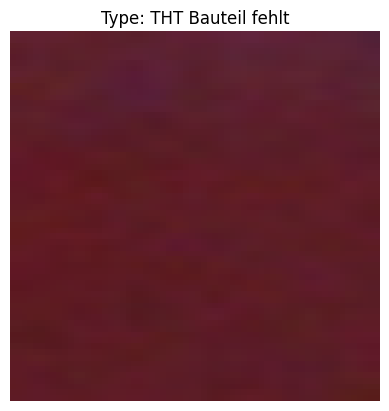

./data/siemens_amberg_labeled/exactInspImage/352


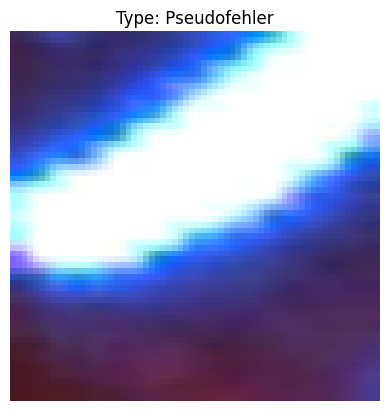

./data/siemens_amberg_labeled/exactInspImage/370


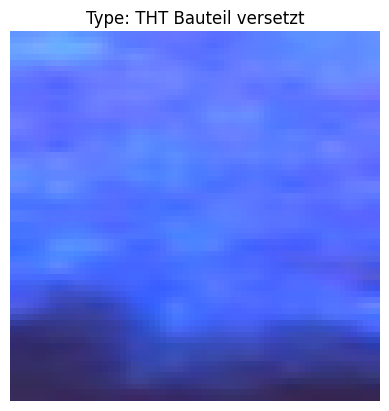

./data/siemens_amberg_labeled/exactInspImage/371


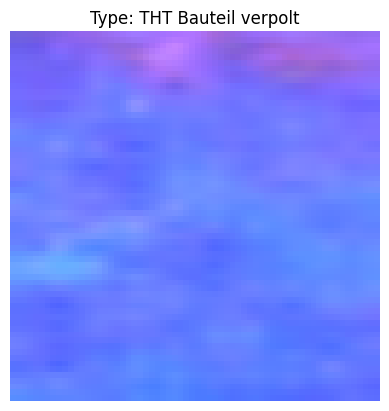

./data/siemens_amberg_labeled/exactInspImage/372


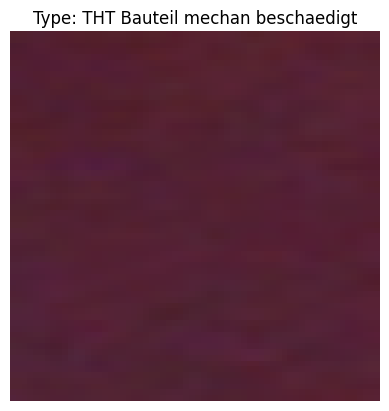

./data/siemens_amberg_labeled/exactInspImage/373


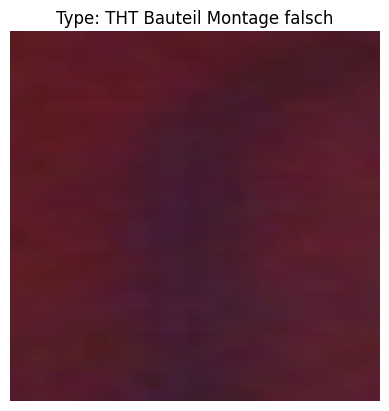

./data/siemens_amberg_labeled/exactInspImage/374


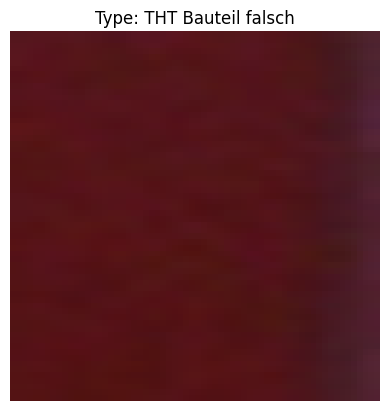

./data/siemens_amberg_labeled/exactInspImage/391


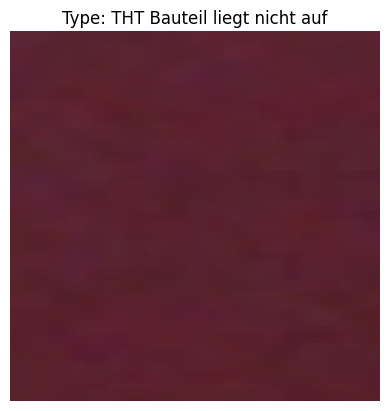

./data/siemens_amberg_labeled/exactInspImage/398


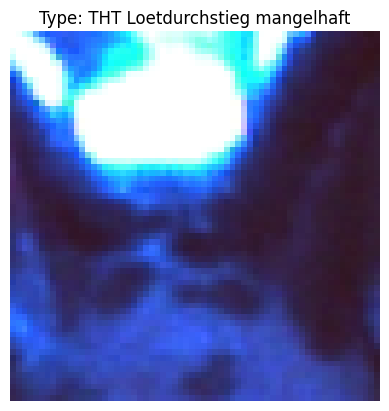

./data/siemens_amberg_labeled/exactInspImage/736


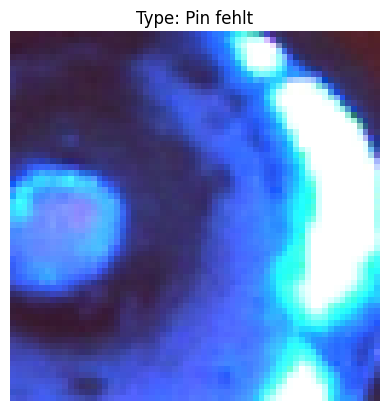

./data/siemens_amberg_labeled/exactInspImage/741


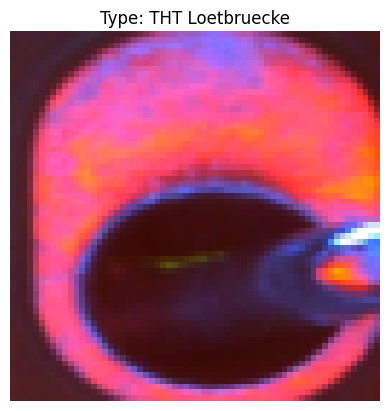

./data/siemens_amberg_labeled/exactInspImage/1129


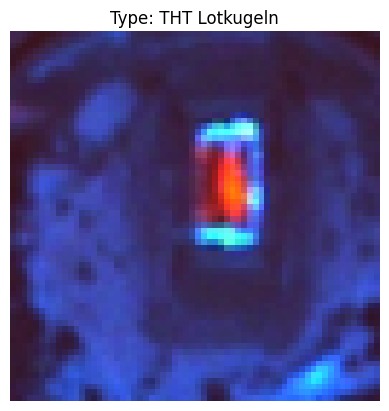

./data/siemens_amberg_labeled/exactInspImage/8626
An error occurred while opening ./data/siemens_amberg_labeled/exactInspImage/8626.png: [Errno 2] No such file or directory: './data/siemens_amberg_labeled/exactInspImage/8626.png'


In [27]:
unique_types = df['errorClassCombined'].unique()
for errorClassCombined in unique_types:
    # Find the first image index for the current type
    image_file = df[df['errorClassCombined'] == errorClassCombined]['imageIndex'].iloc[0]
    print(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file))
    display_image(SIEMENS_DATA_PATH+IMAGE_PATH+str(image_file)+".png", f"Type: {errorClassCombined}")

## Type of errorClassText
### errorClassText

In [28]:
# Unique Value of the errorClassText
unique_values = df['errorClassText'].unique()
print(df['errorClassText'].value_counts())

errorClassText
PseudoFehler                      14595
THT Loetstelle offen               4944
THT Bauteil fehlt                  4425
THT Bauteil liegt nicht auf        3134
THT Loetbruecke                     874
THT Lotkugeln                       719
THT Loetdurchstieg mangelhaft       399
THT Loetst.Form mangelhaft          236
THT Bauteil versetzt                106
THT Bauteil mechan beschaedigt       30
THT Bauteil Montage falsch            2
THT Bauteil falsch                    2
THT Bauteil verpolt                   1
Name: count, dtype: int64


## Save dataframes to csv file

In [38]:
csv_file_path = './data/siemens_data_original.csv'

df.to_csv(csv_file_path, index=False)

print(f"DataFrame is saved to {csv_file_path}")

DataFrame is saved to ./data/siemens_data_original.csv
